#The Uber Datasets
We will perform data analysis on two types of rider data from Uber. The first dataset contains information about the rides taken by one particular user, and the second contains similar details about the rides taken by Uber users in two cities.

#Exploratory Data Analysis on Uber Data

1. Uber Personal Data

First, we import the necessary Python Libraries

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


Loading the CSV file

In [ ]:
uber_data=pd.read_csv('My Uber Drives - 2016.csv')
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


Removing the unwanted values

In [ ]:
#renaming the columns and removing * from column name
uber_data = uber_data.rename(columns = {uber_data.columns[0]:'START_DATE',
                                        uber_data.columns[1]:'END_DATE',
                                        uber_data.columns[2]:'CATEGORY',
                                        uber_data.columns[3]:'START',
                                        uber_data.columns[4]:'STOP',
                                        uber_data.columns[5]:'MILES',
                                        uber_data.columns[6]:'PURPOSE'})

In [ ]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
print(uber_data.isnull().sum())
print(uber_data.isnull().sum().sum())
uber_data=uber_data.dropna()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64
507


In [ ]:
uber_data[uber_data.START.str.contains('\?') == True]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
140,2/20/2016 14:50,2/20/2016 15:54,Business,R?walpindi,R?walpindi,23.1,Meeting
1119,12/27/2016 7:02,12/27/2016 7:14,Business,Kar?chi,Kar?chi,4.9,Temporary Site
1120,12/27/2016 8:37,12/27/2016 8:59,Business,Kar?chi,Kar?chi,5.0,Meal/Entertain
1121,12/27/2016 12:53,12/27/2016 12:57,Business,Kar?chi,Kar?chi,0.6,Meal/Entertain
1122,12/27/2016 14:49,12/27/2016 15:03,Business,Kar?chi,Unknown Location,3.1,Customer Visit
1124,12/27/2016 19:19,12/27/2016 19:50,Business,Kar?chi,Kar?chi,5.5,Customer Visit
1125,12/28/2016 8:34,12/28/2016 9:06,Business,Kar?chi,Unknown Location,10.3,Meal/Entertain
1127,12/28/2016 13:53,12/28/2016 14:01,Business,Kar?chi,Kar?chi,2.0,Errand/Supplies
1128,12/28/2016 15:04,12/28/2016 15:39,Business,Kar?chi,Unknown Location,8.5,Meal/Entertain
1130,12/28/2016 18:33,12/28/2016 18:56,Business,Kar?chi,Kar?chi,3.8,Errand/Supplies


In [ ]:
uber_data['START'] = uber_data['START'].replace({"\?":"a"}, regex = True)
uber_data["STOP"] = uber_data["STOP"].replace({"\?":"a"}, regex = True)

we notice that the date columns contain some composite information such as day, day of the week, month, and time. Separating them gives us more granular information to explore.

In [ ]:
#making string as datetime to identify individual easily

uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'],format="%m/%d/%Y %H:%M")
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'],format="%m/%d/%Y %H:%M")

uber_data['HOUR'] = [x.hour for x in uber_data['START_DATE']]
uber_data['DAY'] = [x.day for x in uber_data['START_DATE']]
uber_data['MONTH'] = [x.month for x in uber_data['START_DATE']]
uber_data['WEEKDAY'] = [calendar.day_name[x.dayofweek] for x in uber_data['START_DATE']]
uber_data['DAY_OF_WEEK'] = [x.dayofweek for x in uber_data['START_DATE']]

In [ ]:
uber_data['date'] = pd.DatetimeIndex(uber_data['START_DATE']).date
uber_data['time'] = pd.DatetimeIndex(uber_data['START_DATE']).hour

#changing into categories of day and night
uber_data['day-night'] = pd.cut(x=uber_data['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

In [ ]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4,2016-01-01,21,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5,2016-01-02,20,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1,2016-01-05,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2,2016-01-06,14,Afternoon
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2,2016-01-06,17,Evening


In [ ]:
uber_data.drop_duplicates(inplace=True)

#Analysis

checking the unique values in dataset of the columns with object datatype.

In [ ]:
obj=(uber_data.dtypes=='object')
object_cols=list(obj[obj].index)

unique_values={}
for col in object_cols:
  unique_values[col]=uber_data[col].unique().size
unique_values

{'CATEGORY': 2,
 'START': 130,
 'STOP': 136,
 'PURPOSE': 10,
 'WEEKDAY': 7,
 'date': 216}

<Axes: xlabel='CATEGORY', ylabel='count'>

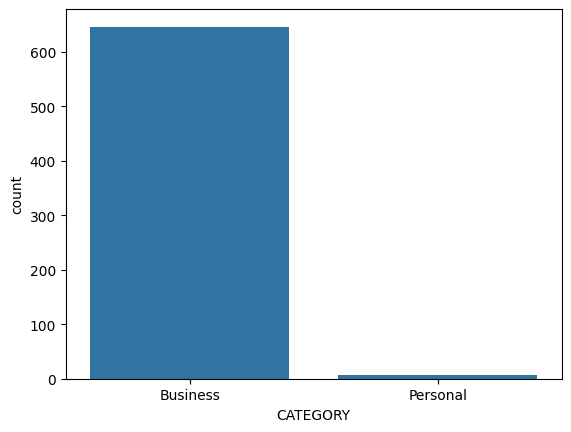

In [ ]:
sns.countplot(x='CATEGORY',data=uber_data)

---------------------------------------------------------------------------------------------------------------------------

<Axes: xlabel='count', ylabel='PURPOSE'>

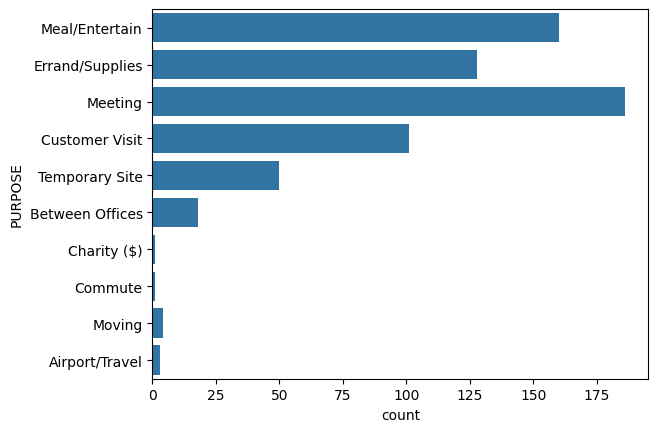

In [ ]:
sns.countplot(y='PURPOSE' ,data=uber_data)

Using these two graphs, it is clear that users most used Uber for work-related meetings and meals most of the time.

---------------------------------------------------------------------------------------------------------------------------

we will be using the time column which we have extracted above.

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300')])

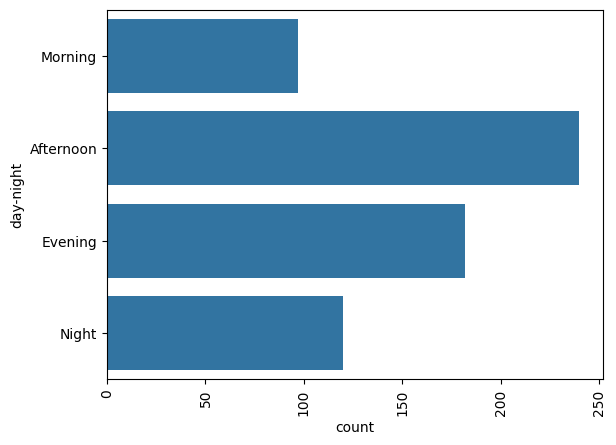

In [ ]:
sns.countplot(uber_data['day-night'])
plt.xticks(rotation=90)

---------------------------------------------------------------------------------------------------------------------------

comparing the two different categories along with the PURPOSE of the user.

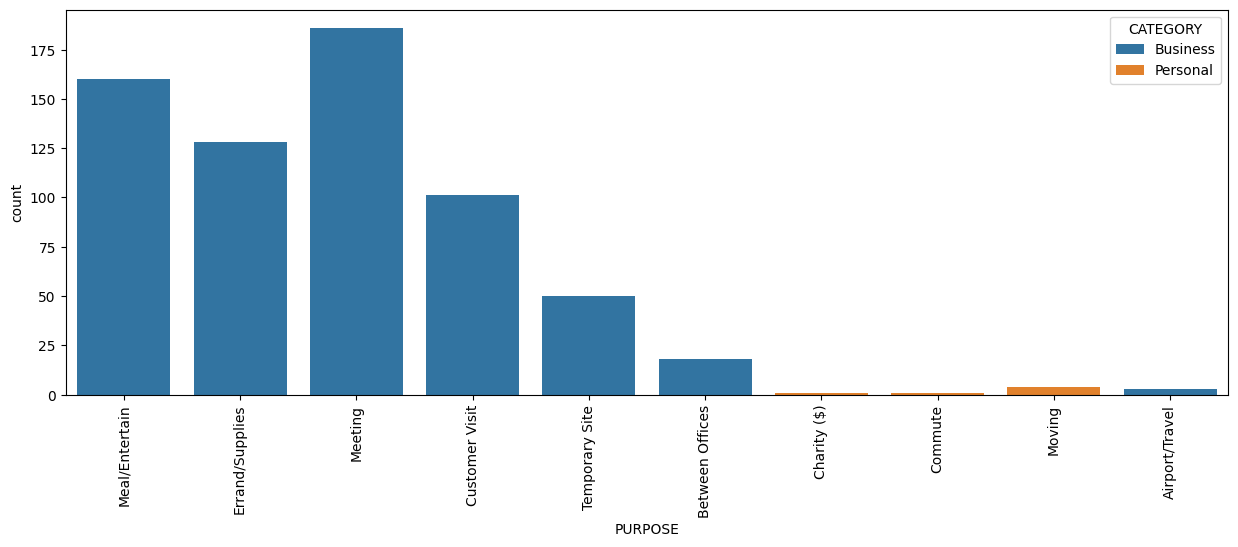

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='PURPOSE',hue='CATEGORY',data=uber_data)
plt.xticks(rotation=90)
plt.show()

Information from the above count-plots :
- Most of the rides are booked for business purpose.
- Most of the people book cabs for
- Meetings and Meal / Entertain purpose.
- Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).

we have seen that CATEGORY and PURPOSE columns are two very important columns. So now we will be using OneHotEncoder to categories them.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
# uber_data = pd.DataFrame(...)

# Columns to be one-hot encoded
object_cols = ['CATEGORY', 'PURPOSE']

# One-hot encode the specified columns
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(uber_data[object_cols]))

# Set the index of the new DataFrame to match the original DataFrame
OH_cols.index = uber_data.index

# Get the feature names for the one-hot encoded columns
OH_cols.columns = OH_encoder.get_feature_names_out(input_features=object_cols)

# Drop the original object columns from the original DataFrame
df_final = uber_data.drop(object_cols, axis=1)

# Concatenate the original DataFrame with the new one-hot encoded columns
uber_data = pd.concat([df_final, OH_cols], axis=1)

# Print the first few rows to verify the transformation
print(uber_data.head())


           START_DATE            END_DATE            START             STOP  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00      Fort Pierce      Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00      Fort Pierce      Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00      Fort Pierce      Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00      Fort Pierce  West Palm Beach   
5 2016-01-06 17:15:00 2016-01-06 17:19:00  West Palm Beach  West Palm Beach   

   MILES  HOUR  DAY  MONTH    WEEKDAY  DAY_OF_WEEK  ...  \
0    5.1    21    1      1     Friday            4  ...   
2    4.8    20    2      1   Saturday            5  ...   
3    4.7    17    5      1    Tuesday            1  ...   
4   63.7    14    6      1  Wednesday            2  ...   
5    4.3    17    6      1  Wednesday            2  ...   

  PURPOSE_Airport/Travel  PURPOSE_Between Offices PURPOSE_Charity ($)  \
0                    0.0                      0.0                 0.0   
2                    0.0

---------------------------------------------------------------------------------------------------------------------------

After that, we can now find the correlation between the columns using heatmap.

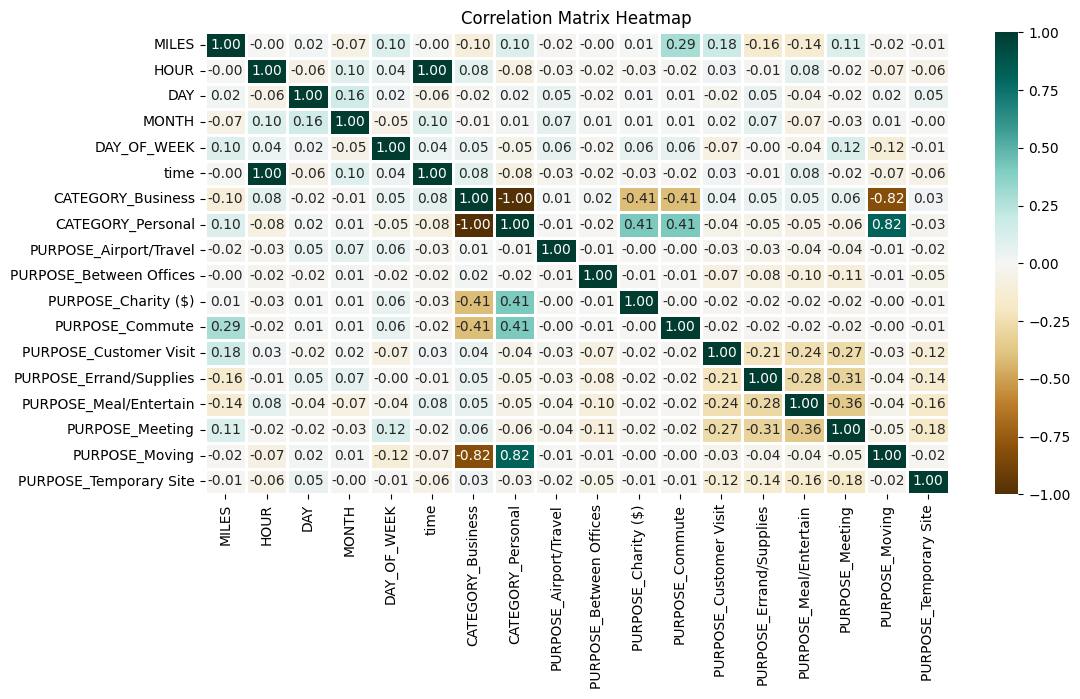

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numeric columns
numeric_cols = uber_data.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix,
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


Information from the heatmap:
- Business and Personal Category are highly negatively correlated, this have already proven earlier. So this plot, justifies the above conclusions.
- There is not much correlation between the features.

---------------------------------------------------------------------------------------------------------------------------

exploring the MILES Column .

<Axes: ylabel='MILES'>

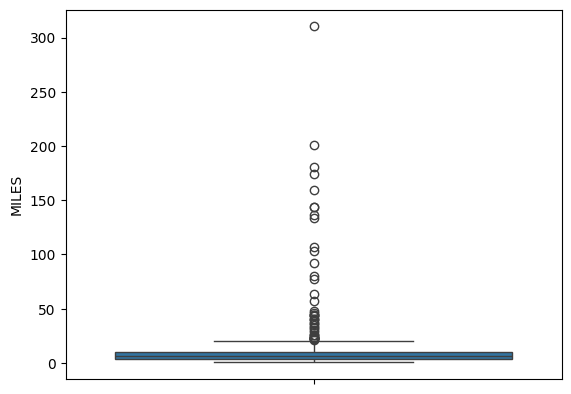

In [ ]:
sns.boxplot(uber_data['MILES'])

As the graph is not clearly understandable. Let’s zoom in it for values lees than 100.

<Axes: ylabel='MILES'>

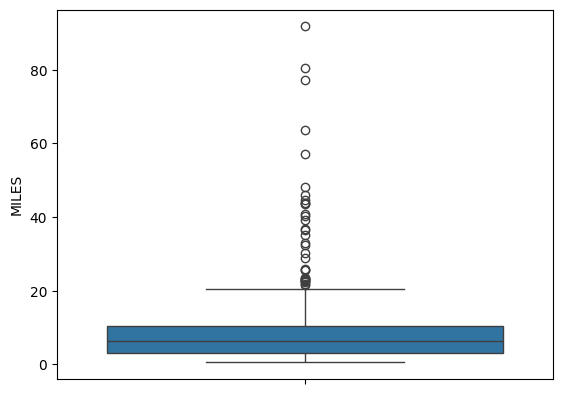

In [ ]:
sns.boxplot(uber_data[uber_data['MILES']<100]['MILES'])

It’s bit visible. But to get more clarity we can use distplot for values less than 40.

<ipython-input-21-a8d8b25209f7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber_data[uber_data['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

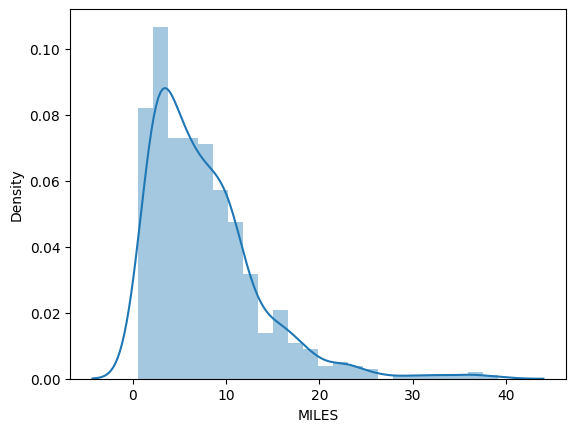

In [ ]:
sns.distplot(uber_data[uber_data['MILES']<40]['MILES'])

Information from the above plots :
- Most of the cabs booked for the distance of 4-5 miles.
- Majorly people chooses cabs for the distance of 0-20 miles.
- For distance more than 20 miles cab counts is nearly negligible.

---------------------------------------------------------------------------------------------------------------------------

Plotting the distance column as a histogram shows that the distances traveled by the user are relatively short

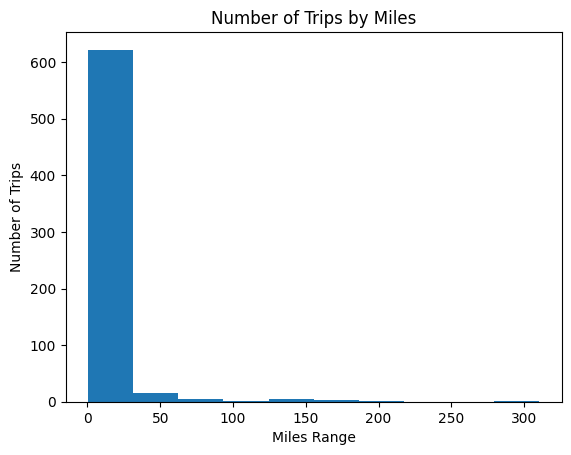

In [ ]:
uber_data['MILES'].plot.hist()
plt.xlabel('Miles Range')
plt.ylabel('Number of Trips')

#setting y_label as price
plt.title('Number of Trips by Miles')
plt.show()

---------------------------------------------------------------------------------------------------------------------------

 at what time of the day the user rides an Uber the most

Text(0.5, 1.0, 'Number of Trips vs Hours')

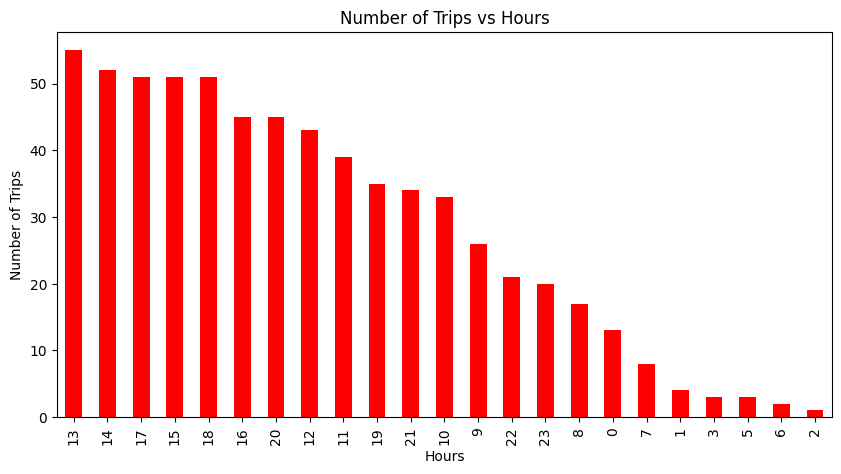

In [ ]:
hours=uber_data['HOUR'].value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Number of Trips')
plt.title('Number of Trips vs Hours')

It is very apparent here that the user travels during lunch hours and in the early evenings more than the rest of the day.

---------------------------------------------------------------------------------------------------------------------------

At a level above a single day, we can look at the user's travel patterns on different days of the week.

Text(0.5, 1.0, 'Number of Trips vs Days')

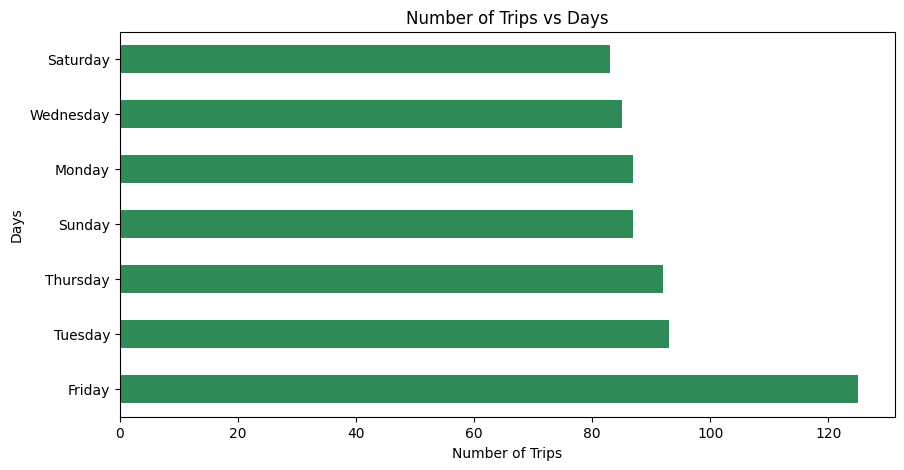

In [ ]:
days=uber_data['WEEKDAY'].value_counts()
days.plot(kind='barh',color='seagreen',figsize=(10,5))
plt.xlabel('Number of Trips')
plt.ylabel('Days')
plt.title('Number of Trips vs Days')

While the user travels almost regularly each day of the week, he travels more on Fridays. Since we know he travels in the evenings too, we can assume that the additional number of trips on Fridays might be recreational.

---------------------------------------------------------------------------------------------------------------------------

we can also look at the month-wise distribution of Uber trips.

Text(0.5, 1.0, 'Number of Trips vs Months')

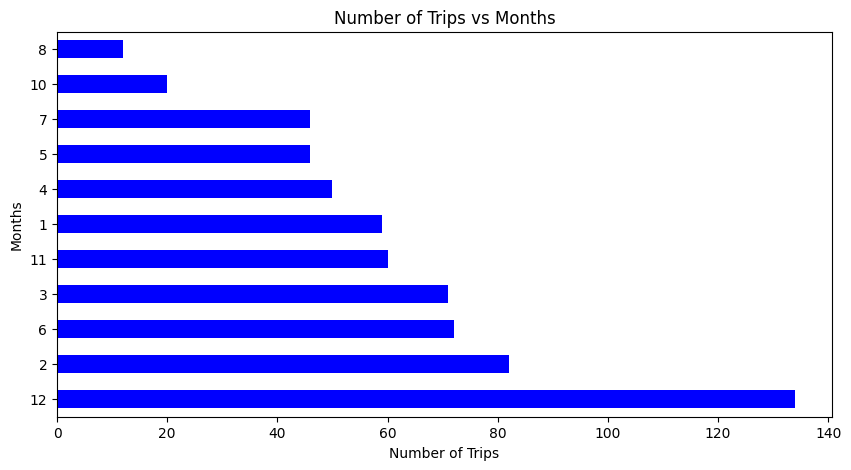

In [ ]:
months=uber_data['MONTH'].value_counts()
months.plot(kind='barh',color='blue',figsize=(10,5))
plt.xlabel('Number of Trips')
plt.ylabel('Months')
plt.title('Number of Trips vs Months')

there were significantly more trips in December 2016 for this user while the rest of the months fall within a specific range.

---------------------------------------------------------------------------------------------------------------------------

Let’s see on which days of December the user traveled in an Uber:

Text(0.5, 1.0, 'Number of Trips vs Days of December')

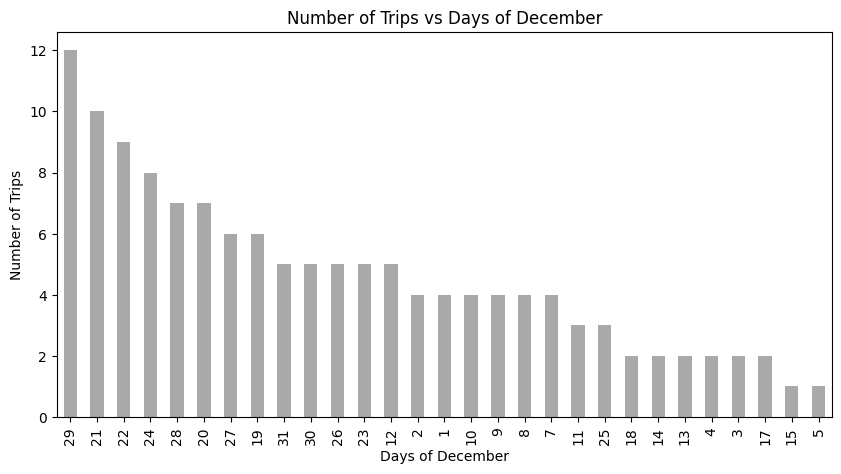

In [ ]:
months=uber_data['DAY'][uber_data['MONTH']==12].value_counts()
months.plot(kind='bar',color='darkgray',figsize=(10,5))
plt.xlabel('Days of December')
plt.ylabel('Number of Trips')
plt.title('Number of Trips vs Days of December')

As expected, the user traveled a lot during the Christmas break. And it is safe to assume that these trips were part of the trips taken during the holiday season.

---------------------------------------------------------------------------------------------------------------------------

let’s see where the user traveled to and from in an Uber.

Text(0.5, 1.0, 'Number of Trips by pickup points')

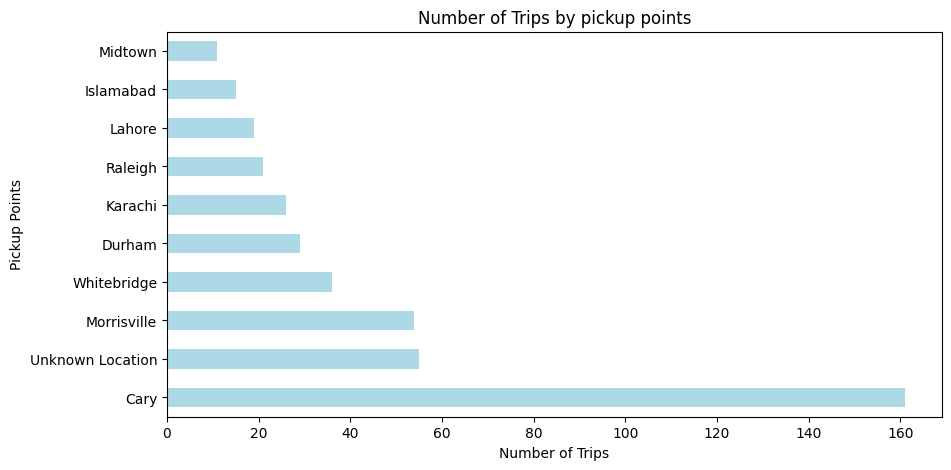

In [ ]:
pic_point=uber_data['START'].value_counts().nlargest(10)
pic_point.plot(kind='barh',color='lightblue',figsize=(10,5))
plt.xlabel('Number of Trips')
plt.ylabel('Pickup Points')
plt.title('Number of Trips by pickup points')

The skewed number of trips start from Cary could mean that the user either resides or works in this region.

---------------------------------------------------------------------------------------------------------------------------

let’s also look at the destination of these trips.

Text(0.5, 1.0, 'Number of Trips by drop points')

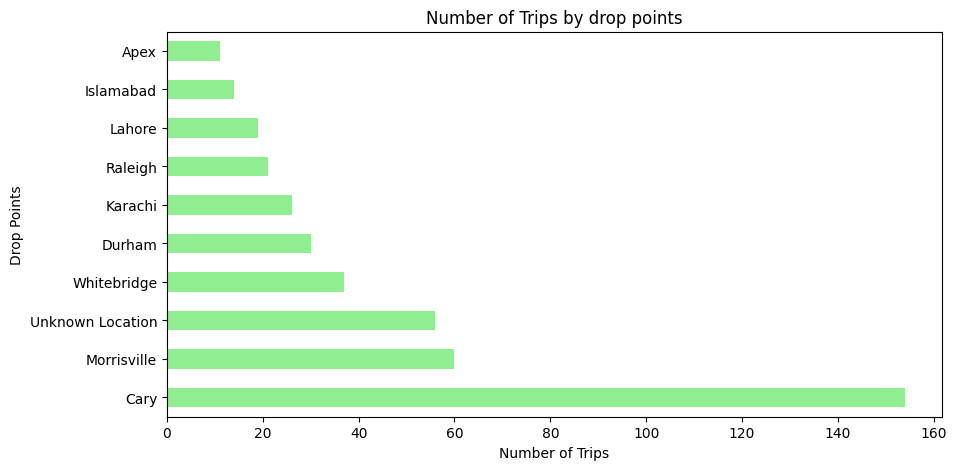

In [ ]:
drop_point=uber_data['STOP'].value_counts().nlargest(10)
drop_point.plot(kind='barh',color='lightgreen',figsize=(10,5))
plt.xlabel('Number of Trips')
plt.ylabel('Drop Points')
plt.title('Number of Trips by drop points')

An observation is how most of these places are the same as the pick-up points. This confirms that the user usually commutes around Cary or Morrisville.

---------------------------------------------------------------------------------------------------------------------------

we can still check how often the user takes particular “trips” from location A to B.

Text(0.5, 1.0, 'Point - Point Trips Counts')

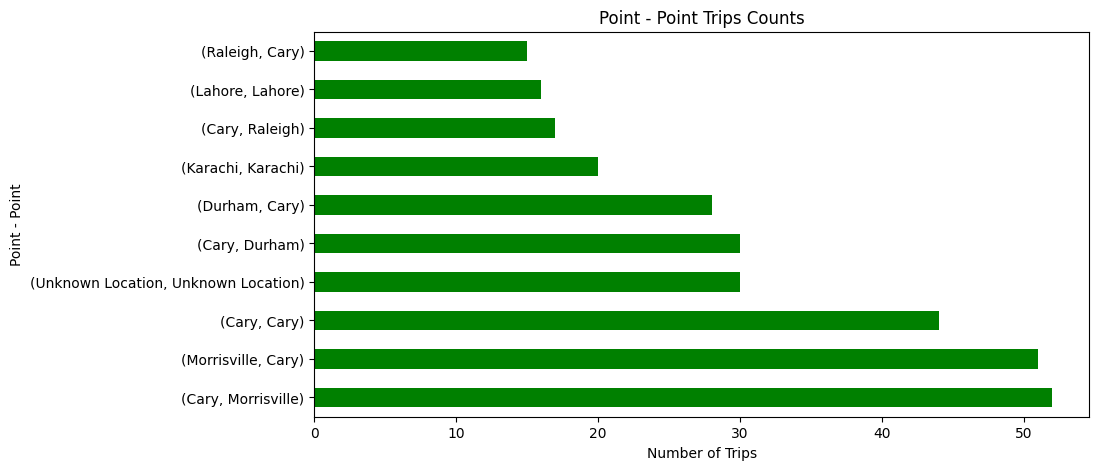

In [ ]:
p_p=uber_data[['START','STOP']].value_counts().nlargest(10)
p_p.plot(kind='barh',color='green',figsize=(10,5))
plt.xlabel('Number of Trips')
plt.ylabel('Point - Point')
plt.title('Point - Point Trips Counts')

As we deduced, the user travels very frequently between Cary and Morrisville.

---------------------------------------------------------------------------------------------------------------------------

In [ ]:
print("\n.....Average Length of the Trip.....\n")

# Business
business_miles = uber_data[uber_data['CATEGORY_Business'] == 1]['MILES'].mean()
print('Business:', round(business_miles, 3))

# Personal
personal_miles = uber_data[uber_data['CATEGORY_Personal'] == 1]['MILES'].mean()
print('Personal:', round(personal_miles, 3))

# Meal/Entertain
meal_entertain_miles = uber_data[uber_data['PURPOSE_Meal/Entertain'] == 1]['MILES'].mean()
print('Meal/Entertain:', round(meal_entertain_miles, 3))



.....Average Length of the Trip.....

Business: 10.972
Personal: 35.583
Meal/Entertain: 5.698


we have seen how much knowledge this elementary dataset can give us about the user’s riding patterns and the user himself.

In [ ]:
# Exporting tha data in csv format for visualization job...
uber_data.to_csv('uber_data01.csv', index=False)

###################################################################

#Exploratory Data Analysis of Boston Uber Data

2. Uber and Lyft Dataset Boston, MA


In [ ]:
data2=pd.read_csv('rideshare_kaggle.csv')

In [ ]:
data2.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1.544980e+09,39.89,1.545012e+09,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1.543252e+09,40.49,1.543234e+09,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1.543338e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1.543507e+09,34.67,1.543550e+09,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1.543421e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09


Since there are more than 55 columns in this dataset, there are many that might be useless for our simple use case. So we can just drop the extra columns and work with the rest.

In [ ]:
extra_cols = [ 'apparentTemperature', 'precipIntensity' ,
'humidity',
'windSpeed',
'apparentTemperatureHigh',
'dewPoint',
'precipIntensityMax',
'apparentTemperatureMax',
'cloudCover',
'moonPhase',
'windGustTime',
'visibility',
'temperatureHighTime' ,
'apparentTemperatureHighTime',
'apparentTemperatureLow' ,
'apparentTemperatureLowTime',
'temperatureMinTime' ,
'temperatureMaxTime',
'apparentTemperatureMin',
'apparentTemperatureMinTime', 'apparentTemperatureMaxTime',
'windBearing' ,
'sunriseTime',
'uvIndex' ,
'visibility.1',
'ozone',
'sunsetTime', 'uvIndexTime']

data2 = data2.drop(extra_cols, axis=1)

In [ ]:
data2.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'long_summary', 'precipProbability', 'windGust',
       'temperatureHigh', 'temperatureLow', 'temperatureLowTime', 'icon',
       'pressure', 'temperatureMin', 'temperatureMax'],
      dtype='object')

In [ ]:
data2.sample(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,long_summary,precipProbability,windGust,temperatureHigh,temperatureLow,temperatureLowTime,icon,pressure,temperatureMin,temperatureMax
5973,66ab7b16-e7ec-42bc-9db7-bb161b53bfa2,1.543882e+09,0,4,12,2018-12-04 00:03:02,America/New_York,Boston University,Theatre District,Uber,...,Foggy in the morning.,0.0,6.32,57.42,33.60,1.543921e+09,clear-night,1002.03,42.86,57.42
30807,4cfe31c1-3dd6-4a0b-bd46-961efe32c7cf,1.544928e+09,2,16,12,2018-12-16 02:40:11,America/New_York,South Station,Theatre District,Lyft,...,Mostly cloudy throughout the day.,0.0,5.77,54.29,38.48,1.544954e+09,partly-cloudy-night,1024.46,39.74,54.29
31811,1868eb38-a11a-4063-a852-07f5ae9daf40,1.543267e+09,21,26,11,2018-11-26 21:17:09,America/New_York,North Station,South Station,Lyft,...,"Rain until morning, starting again in the eve...",0.0,6.88,46.59,41.77,1.543298e+09,cloudy,1010.49,40.35,46.59
34743,94192220-949a-40eb-8625-8963468be9b8,1.543303e+09,7,27,11,2018-11-27 07:09:23,America/New_York,Beacon Hill,North End,Lyft,...,Light rain in the morning.,1.0,13.93,47.11,33.85,1.543399e+09,rain,996.90,36.34,47.11
31701,34ce4cc9-6f8f-45da-92bb-53e7f59d491e,1.543425e+09,17,28,11,2018-11-28 17:05:07,America/New_York,South Station,Back Bay,Uber,...,Mostly cloudy throughout the day.,0.0,14.90,42.57,37.37,1.543489e+09,cloudy,991.33,33.70,42.57
2600,b2efc6e0-716b-4c09-9311-a5dbb8176ddb,1.544870e+09,10,15,12,2018-12-15 10:35:09,America/New_York,Haymarket Square,North Station,Uber,...,Possible drizzle in the morning.,0.0,5.34,54.38,38.49,1.544954e+09,cloudy,1021.21,39.44,54.38
29953,e5b82690-69d0-40f4-a447-28fb914b8bed,1.543634e+09,3,1,12,2018-12-01 03:08:04,America/New_York,North End,Beacon Hill,Lyft,...,Overcast throughout the day.,0.0,3.33,42.13,30.17,1.543662e+09,partly-cloudy-night,1018.24,28.90,42.13
20231,424db67c-0b11-4846-a084-d62052c675c3,1.543608e+09,20,30,11,2018-11-30 20:07:56,America/New_York,Back Bay,Fenway,Lyft,...,Mostly cloudy throughout the day.,0.0,3.82,42.05,31.31,1.543662e+09,cloudy,1016.60,28.42,42.05
15164,607b788a-75a7-4e4c-ac3e-a3dc7123fd8d,1.543753e+09,12,2,12,2018-12-02 12:13:00,America/New_York,Beacon Hill,Fenway,Lyft,...,Light rain until evening.,1.0,7.16,50.80,44.97,1.543817e+09,rain,1017.35,36.32,50.80
28339,fa9336c7-e39e-4d5c-a879-4f0778dffdcc,1.544860e+09,7,15,12,2018-12-15 07:50:11,America/New_York,South Station,North Station,Lyft,...,Mostly cloudy throughout the day.,0.0,7.94,54.40,39.22,1.544954e+09,partly-cloudy-night,1022.09,39.78,54.40


we handle NAN or NULL values

we’ll perform the same Uber Data Analysis as we did for the previous dataset.

In [ ]:
print(data2.isnull().sum())
print(data2.isnull())
data2=data2.dropna()

id                       0
timestamp                0
hour                     0
day                      0
month                    0
datetime                 0
timezone                 0
source                   0
destination              0
cab_type                 0
product_id               0
name                     0
price                 2941
distance                 0
surge_multiplier         0
latitude                 0
longitude                0
temperature              0
short_summary            0
long_summary             0
precipProbability        0
windGust                 0
temperatureHigh          0
temperatureLow           1
temperatureLowTime       1
icon                     1
pressure                 1
temperatureMin           1
temperatureMax           1
dtype: int64
          id  timestamp   hour    day  month  datetime  timezone  source  \
0      False      False  False  False  False     False     False   False   
1      False      False  False  False  False     Fal

#Analysis

most common pick-up hours for Uber rides in Boston.

Text(0.5, 1.0, 'Number of Trips vs Hours')

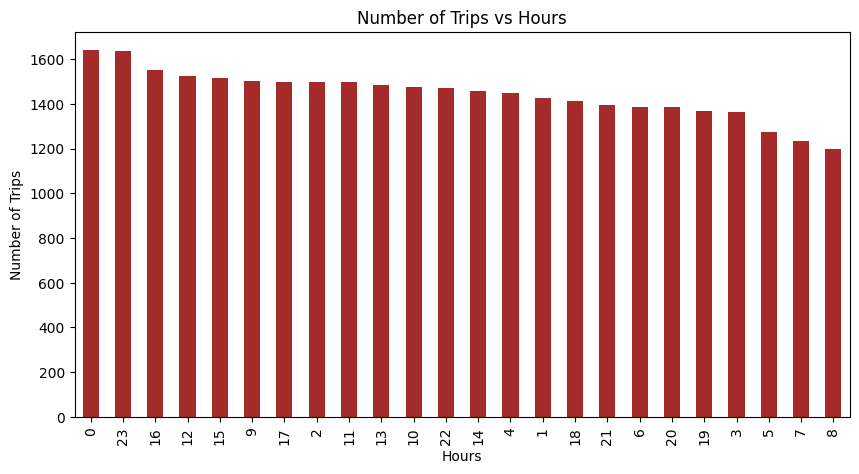

In [ ]:
houes=data2['hour'].value_counts()
houes.plot(kind='bar',color='brown',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Number of Trips')
plt.title('Number of Trips vs Hours')

the result is very different from the travel patterns of a single person.
Given Uber’s popularity, rides are almost equally frequent at all day hours (and night). However, more rides are ordered towards midnight or during business hours in the afternoon.

---------------------------------------------------------------------------------------------------------------------------

To analyze the day of the week data, we need to generate the names of days from the timestamps.

In [ ]:
import calendar
import pandas as pd

day_week = [calendar.day_name[x.dayofweek] for x in
          pd.to_datetime(data2['datetime'], format= "%Y-%m-%d %H:%M:%S")] # Changed the format string to match the actual date format
day_week = pd.Series(day_week)

Text(0.5, 1.0, 'Number of Trips vs Days')

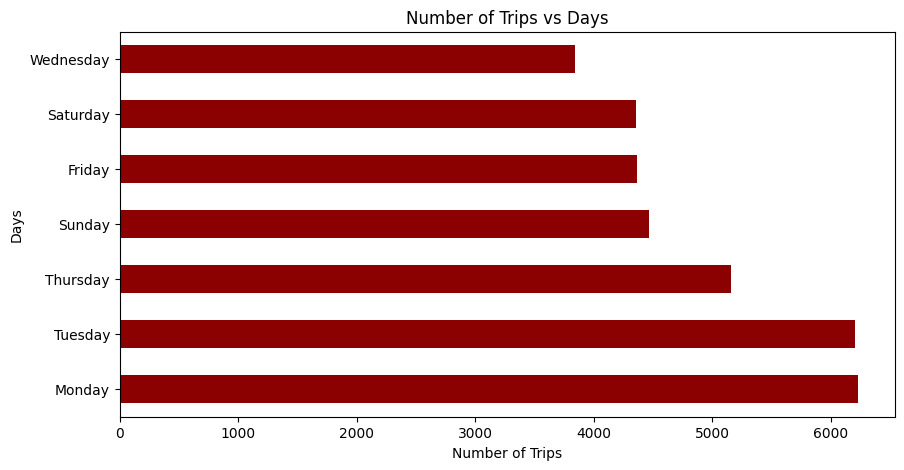

In [ ]:
days=day_week.value_counts()
days.plot(kind='barh',color='darkred',figsize=(10,5))
plt.xlabel('Number of Trips')
plt.ylabel('Days')
plt.title('Number of Trips vs Days')

more rides are ordered on the weekdays of Monday and Tuesday

---------------------------------------------------------------------------------------------------------------------------

the data only contains details of rides in Nov and December 2018. more rides were ordered in December similar to the personal Uber data analysis.

Text(0.5, 1.0, 'Number of trips Vs Months')

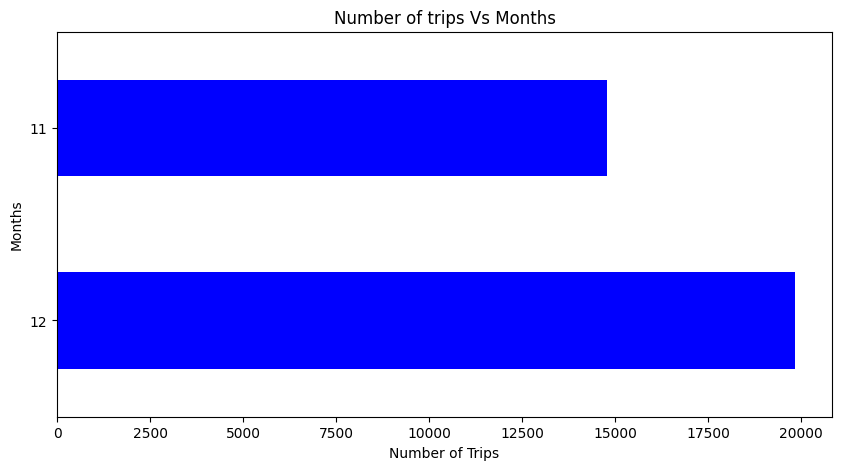

In [ ]:
months =data2['month'].value_counts()
months.plot(kind='barh',color='blue',figsize=(10,5))
plt.xlabel('Number of Trips')
plt.ylabel('Months')
plt.title('Number of trips Vs Months')

Uber rides were not more frequent during the holiday season in Boston.

Text(0.5, 1.0, 'Number of Trips vs Days of December')

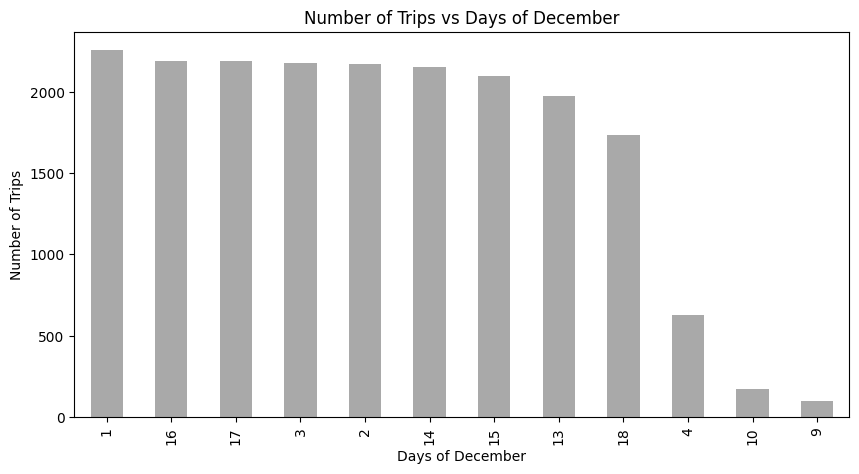

In [ ]:
months=data2['day'][data2['month']==12].value_counts()
months.plot(kind='bar',color='darkgray',figsize=(10,5))
plt.xlabel('Days of December')
plt.ylabel('Number of Trips')
plt.title('Number of Trips vs Days of December')

 we note that there were no especially busy pickup or drop-off points in Boston, and most popular locations received a similar number of pick-up and drop-off requests. The Financial District (the business hub of Boston) received slightly more traffic than the rest – confirming the afternoon business meetings on Mondays and Tuesdays.

Text(0.5, 1.0, 'Number of Trips by pickup points')

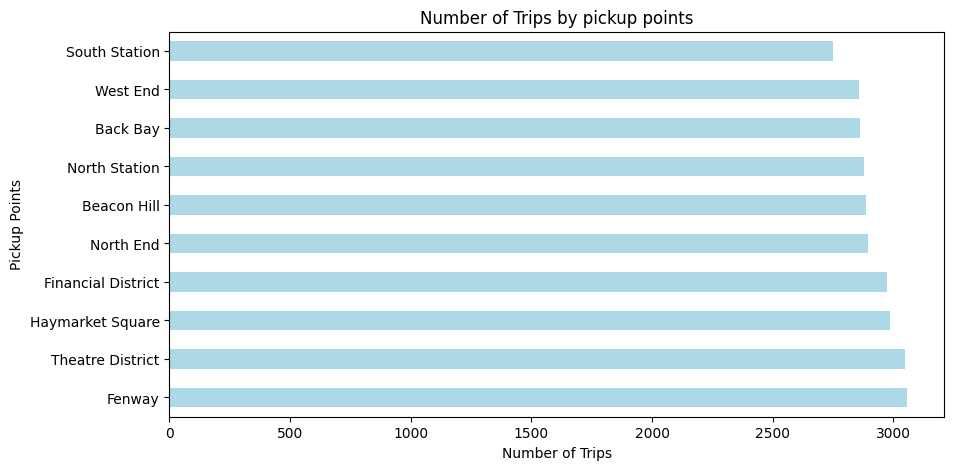

In [ ]:
pic_point=data2['source'].value_counts().nlargest(10)
pic_point.plot(kind='barh',color='lightblue',figsize=(10,5))
plt.xlabel('Number of Trips')
plt.ylabel('Pickup Points')
plt.title('Number of Trips by pickup points')

Text(0.5, 1.0, 'Number of Trips by Drop points')

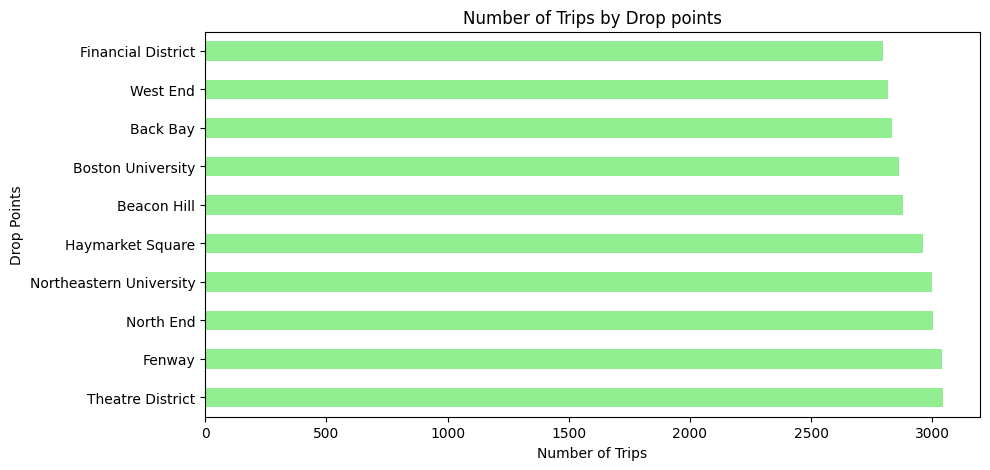

In [ ]:
drop_point=data2['destination'].value_counts().nlargest(10)
drop_point.plot(kind='barh',color='lightgreen',figsize=(10,5))
plt.xlabel('Number of Trips')
plt.ylabel('Drop Points')
plt.title('Number of Trips by Drop points')

 looking at the whole trip data, we find that most trips from and to the Financial District have the South Station on the other end.
 This means that people use Uber to reach the Metro more frequently than to reach their desired destination directly.

Text(0.5, 1.0, 'Point - Point Trips Counts')

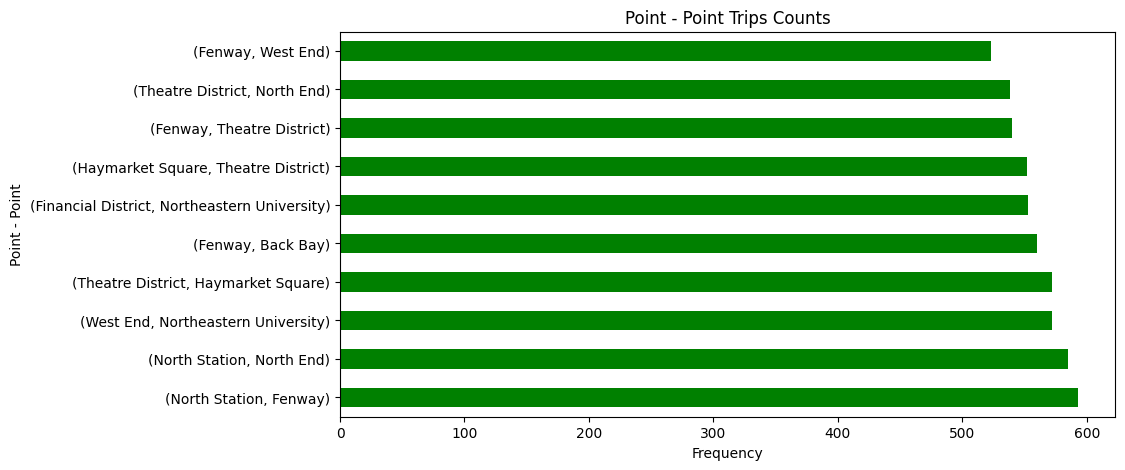

In [ ]:
p_p=data2[['source','destination']].value_counts().nlargest(10)
p_p.plot(kind='barh',color='green',figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Point - Point')
plt.title('Point - Point Trips Counts')

now which types of Uber cabs do people prefer in Boston:

Text(0.5, 1.0, 'Number of Trips by cabs Name')

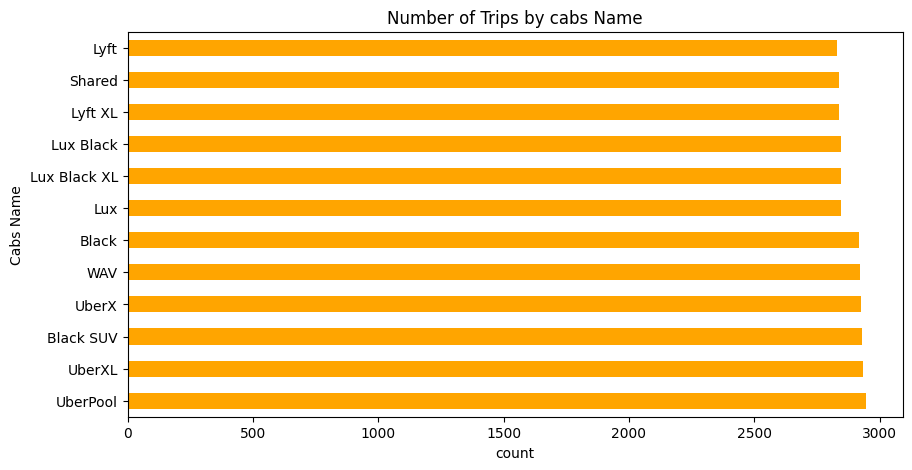

In [ ]:
cabs=data2['name'].value_counts()
cabs.plot(kind='barh',color='orange',figsize=(10,5))
plt.xlabel('count')
plt.ylabel('Cabs Name')
plt.title('Number of Trips by cabs Name')

In [ ]:
# Exporting tha data in csv format for visualization job...

data2.to_csv('uber_data02.csv', index=False)

#Predictive Analysis for Uber Price Prediction using Machine Learning

using machine learning models to train on the Uber dataset and predict the price of the Uber trip for given features such as:

    -time of day
    -cab type
    -destination
    -source
    -surge charges

using ML models is to bring all the categorical data to the numeric format using label encoding.

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [ ]:
data2['id']=label_encoder.fit_transform(data2['id'])
data2['datetime']=label_encoder.fit_transform(data2['datetime'])
data2['timezone']=label_encoder.fit_transform(data2['timezone'])
data2['destination']=label_encoder.fit_transform(data2['destination'])
data2['product_id'] = label_encoder.fit_transform(data2['product_id'])
data2['short_summary'] = label_encoder.fit_transform(data2['short_summary'])
data2['long_summary'] = label_encoder.fit_transform(data2['long_summary'])
data2['name']=label_encoder.fit_transform(data2['name'])

Labels for the Cab Type Name

In [ ]:
print("Class mapping of Name:")
for i ,item in enumerate(label_encoder.classes_):
  print(item, " :- ", i)

Class mapping of Name:
Black  :-  0
Black SUV  :-  1
Lux  :-  2
Lux Black  :-  3
Lux Black XL  :-  4
Lyft  :-  5
Lyft XL  :-  6
Shared  :-  7
UberPool  :-  8
UberX  :-  9
UberXL  :-  10
WAV  :-  11


Labels for the Pickup Point

In [ ]:
data2['source']=label_encoder.fit_transform(data2['source'])
print("Class mapping of Source:")
for i ,item in enumerate(label_encoder.classes_):
  print(item, " :- ", i)

Class mapping of Source:
Back Bay  :-  0
Beacon Hill  :-  1
Boston University  :-  2
Fenway  :-  3
Financial District  :-  4
Haymarket Square  :-  5
North End  :-  6
North Station  :-  7
Northeastern University  :-  8
South Station  :-  9
Theatre District  :-  10
West End  :-  11


Labels for the Current Weather

In [ ]:
data2['icon']=label_encoder.fit_transform(data2['icon'])
print("Class mapping of Icon:")
for i ,item in enumerate(label_encoder.classes_):
  print(item, " :- ", i)

Class mapping of Icon:
 clear-day   :-  0
 clear-night   :-  1
 cloudy   :-  2
 fog   :-  3
 partly-cloudy-day   :-  4
 partly-cloudy-night   :-  5
 rain   :-  6


Labels for the Cabe Type

In [ ]:
data2['cab_type']=label_encoder.fit_transform(data2['cab_type'])
print("Class mapping of Cabe Type:")
for i ,item in enumerate(label_encoder.classes_):
  print(item, " :- ", i)

Class mapping of Cabe Type:
Lyft  :-  0
Uber  :-  1


we are only predicting the prices for Uber, our dataset will contain around 385,000 samples.

In [ ]:
len(data2[data2['cab_type']==1])

17579

###Creating the Training Dataset

we create a train/test split of the dataset with the price column as the target/output.

In [ ]:
x = data2[data2['cab_type']==1].drop(['price', 'cab_type'], axis=1)
y = data2[data2['cab_type']==1]['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

looking for the typical prices for the rides

and from observation most rides costs between 5 and 20 each

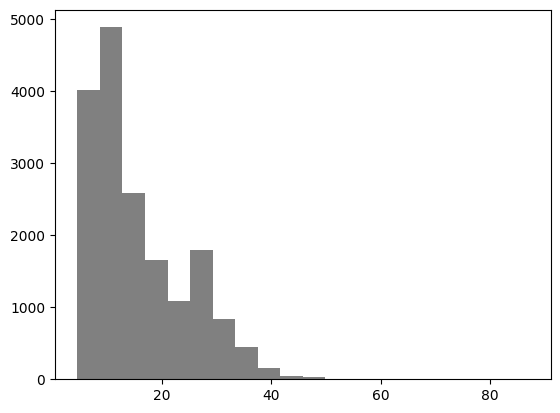

In [ ]:
plt.hist(y, bins=20, color = 'gray')
plt.show()

We will train and compare the performance of four ML models:-
- linear regression
- decision tree
- random forest
- gradient boosting.

In [ ]:
from   sklearn.feature_selection   import   RFE
from   sklearn.linear_model   import   LinearRegression
from   sklearn.tree   import   DecisionTreeRegressor
from   sklearn.ensemble   import   RandomForestRegressor
from   sklearn   import  ensemble

defining a function that will fit and test all models

In [ ]:
def train_test_models(x_train, y_train, x_test, y_test):
    print("Linear Regression... ")
    lr_model = LinearRegression()
    lr_model = lr_model.fit(x_train,  y_train)
    print(lr_model.score(x_test,  y_test))


    print("Decision Tree... ")
    dt_model = DecisionTreeRegressor(random_state = 0, max_depth = 10)
    dt_model.fit(x_train,  y_train)
    print(dt_model.score(x_test,  y_test))


    print("Random Forest... ")
    rf_model = RandomForestRegressor(n_estimators = 20, random_state = 0)
    rf_model.fit(x_train,  y_train)
    print(rf_model.score(x_test,  y_test))


    print("GBM... ")
    gbm_model = ensemble.GradientBoostingRegressor(n_estimators = 200, max_depth = 5)
    gbm_model.fit(x_train,  y_train)
    print(gbm_model.score(x_test,  y_test))

    return [lr_model, dt_model, rf_model, gbm_model]

we are working with 25 chosen features, it would be good to perform feature selection or elimination to see if we can reduce the number optimally even more

 Recursive feature elimination or RFE reduces the data complexity by iteratively removing features and checking the model performance until the optimal number of features (having performance close to the original) is left.

define a function that runs RFE and extracts the most important features for each type of model trained. This function takes as input the trained_model (with which we will compare the performance of the reduced number of features), training and testing data, and the number of features we need in the final dataset after running the RFE.

In [ ]:
def feature_eliminate(trained_model, x, y, n_features=40):
    rfe = RFE(trained_model, n_features_to_select=n_features)
    rfe = rfe.fit(x, y)
    x_new = x[x.columns[rfe.support_]]
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)
    new_fit = trained_model.fit(x_train, y_train)
    print(new_fit.score(x_test, y_test))

checking the scores on models fitted using all 25 features:

In [ ]:
train_test_models(x_train, y_train, x_test, y_test)

Linear Regression... 
0.6416823553754996
Decision Tree... 
0.9147815129022793
Random Forest... 
0.936529708097156
GBM... 
0.9487336508792741


[LinearRegression(),
 DecisionTreeRegressor(max_depth=10, random_state=0),
 RandomForestRegressor(n_estimators=20, random_state=0),
 GradientBoostingRegressor(max_depth=5, n_estimators=200)]

GBM performs the best, while Linear Regression is poor at capturing the relations among features.

found out that the models perform marginally better with fewer features by running the code below.

In [ ]:
model_list= train_test_models(x_train,y_train,x_test,y_test)
n_features=[5,10]

for model in model_list:
  for nf in n_features:
    print(f"{model}:-{nf}features")
    feature_eliminate(model, x, y, nf)


Linear Regression... 
0.6416823553754996
Decision Tree... 
0.9147815129022793
Random Forest... 
0.936529708097156
GBM... 
0.9487970541281782
LinearRegression():-5features
0.6527237232375793
LinearRegression():-10features
0.6528979154641134
DecisionTreeRegressor(max_depth=10, random_state=0):-5features
0.9275146143964927
DecisionTreeRegressor(max_depth=10, random_state=0):-10features
0.9228940009724973
RandomForestRegressor(n_estimators=20, random_state=0):-5features
0.939770382415836
RandomForestRegressor(n_estimators=20, random_state=0):-10features
0.9400264132691444
GradientBoostingRegressor(max_depth=5, n_estimators=200):-5features
0.9522661167519505
GradientBoostingRegressor(max_depth=5, n_estimators=200):-10features
0.9510918458929079


Linear regression, decision tree, random forest, and GBM perform better with 5 or 10 features instead of 25.

#Key Findings
Based on the analysis of the Uber datasets, here are some key findings:

**1. For the Uber Personal Data :-**
- The user primarily uses Uber for work-related purposes, followed by meals, errands, and customer visits.
- The distances traveled by the user are relatively short, indicating local or city travel.
- The user tends to travel during lunch hours and early evenings, possibly for client visits or lunches.
- There is regular travel throughout the week, with slightly higher trips on Fridays, which may indicate recreational activities.
- December 2016 had significantly more trips, likely due to the holiday season.
- The user frequently travels between Cary and Morrisville, suggesting a frequent commute within or between these locations.
**2. For the Boston Uber Data:-**
- Uber rides in Boston are relatively evenly distributed throughout the day, with slightly higher frequencies at midnight and during business hours in the afternoon.
- Weekday travel patterns show no significant variations, indicating consistent demand throughout the week.
- The dataset includes more than 55 columns, but only a subset of columns was considered for analysis.
- GBM demonstrated the highest performance, while Linear Regression showed poor ability to capture the relationships among features. Decision Tree, Random Forest, and GBM performed better when trained with a reduced number of features (5 or 10) compared to using all 25 features.
- The analysis suggests that a smaller set of features can lead to comparable or even improved model performance.

#Bussiness Suggestions
Based on these findings, here are some business suggestions:

**Work-related Focus**: Since the user in the personal dataset primarily uses Uber for work-related purposes, Uber can target similar users and offer business-oriented features or services. This could include tailored offers for corporate clients, preferred routes for business travel, or partnerships with companies for employee transportation.

**Targeted Marketing:** Uber can leverage the insights from both datasets to create targeted marketing campaigns. For example, during the holiday season, Uber can offer special promotions or discounts to encourage more usage. In Boston, Uber can focus on marketing campaigns that highlight the convenience and availability of rides throughout the day.

**Improved Route Optimization:** Given the frequent travel patterns between specific locations (Cary and Morrisville in the personal dataset), Uber can optimize route planning and dispatch algorithms to ensure efficient and reliable rides for users traveling between these locations. This could result in shorter wait times and better overall user experience.

**Enhanced Recommendation System:** By understanding user preferences and travel patterns, Uber can enhance its recommendation system to suggest popular destinations, nearby attractions, or personalized offers based on user history. This can improve user engagement and increase overall satisfaction.

**Data-Driven Decision Making:** Uber can continue to invest in data analysis and exploration to gain deeper insights into user behavior, preferences, and market trends. This can inform strategic decision-making, product development, and service improvements.

Encourage regular communication and knowledge sharing between data scientists and operational teams to leverage the insights from machine learning models effectively and align them with business objectives.

**Business suggestion:** Consider focusing on a subset of key features rather than using the entire feature set when training models. This can lead to more efficient and accurate predictions, reducing computational resources and simplifying model interpretation.

Overall, leveraging data analysis and insights can help Uber optimize operations, enhance the user experience, and drive business growth